# **1. Загрузка данных**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install opendatasets

username: vchemsmisl
key: 67a268431ea97deeb93edc5dd2d5e14b

In [ ]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vchemsmisl
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023


100%|██████████| 15.2M/15.2M [00:00<00:00, 79.6MB/s]


In [ ]:
customer_df = pd.read_csv('/content/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv')

In [ ]:
customer_df.drop('days_since_prior_order', axis=1, inplace=True)

In [ ]:
customer_df.head(7)

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,83,5,0,4,produce,fresh vegetables
5,2425083,49125,1,2,18,91,6,0,16,dairy eggs,soy lactosefree
6,2425083,49125,1,2,18,120,7,0,16,dairy eggs,yogurt


In [ ]:
customer_df.shape

(2019501, 11)

Снова попрошу здесь ничего не менять.  

In [ ]:
rng=np.random.RandomState(20)

unique_users = rng.choice(customer_df.user_id.unique(), 3000, replace=False)

# Берем только действия 3 тыс. уникальных пользователей (всего их в наборе 170 тыс.)

In [ ]:
orders_table = customer_df.loc[customer_df['user_id'].isin(unique_users)]

In [ ]:
orders_table

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,reordered,department_id,department,product_name
150,3257000,59512,10,3,17,21,1,1,16,dairy eggs,packaged cheese
151,3257000,59512,10,3,17,26,2,1,7,beverages,coffee
152,3257000,59512,10,3,17,24,3,1,4,produce,fresh fruits
153,3257000,59512,10,3,17,83,4,1,4,produce,fresh vegetables
154,3257000,59512,10,3,17,120,5,1,16,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...,...
2019132,2969129,153312,13,3,12,24,7,0,4,produce,fresh fruits
2019133,2969129,153312,13,3,12,64,8,0,7,beverages,energy sports drinks
2019134,2969129,153312,13,3,12,64,9,0,7,beverages,energy sports drinks
2019135,2969129,153312,13,3,12,72,10,0,13,pantry,condiments


# **2. Ознакомление**

**Что мы будем делать**:  
У нас есть большой набор данных с заказами пользователей.  
Мы бы хотели осуществить сегментацию (кластеризацию), т.е. выделить определенные группы пользователей, имеющих значимое поведение для продуктового бизнеса.  
Но мы не можем просто так взять и начать работать с таблицей заказов: ее структура типична для баз данных, но не для нас с вами.  
На основе таблицы заказов необходимо сформировать привычную нам таблицу "объекты-признаки", где объектами будут пользователи, а признаками - различные особенности их поведения.  

Ознакомиться с данными можно здесь: https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023

Внимательно прочитайте, что означает каждый признак в таблице. Обратите внимание, что не все признаки являются количественными, даже если значение в них - количественное (например, order number).  

# **3. Baseline и памятка по работе в pandas**

Обязательно запустите код в этой секции.  

### Baseline

In [ ]:
users = pd.DataFrame(index=np.sort(unique_users))

In [ ]:
users # пустой датафрейм с пользователями, признаки будем формировать сами

""
39
46
270
293
300
...
205877
205974
205978
206008


### Памятка (читлист)

#### Groupby
Для группировки данных используем ``groupby``.  
Чтобы ``groupby`` вернул ``dataframe`` или ``Series`` к нему необходимо применить какой-либо сокращающий (аггрегирующий) метод (``unique``, ``std``, ``mean`` и т.п.).

In [ ]:
unique_orders = orders_table.groupby(['user_id'])['order_number'].nunique() # кол-во уникальных order_number по каждому user-у
unique_orders
# получаем уникальное количество заказов, которое сделал каждый пользователь

user_id
39        1
46        1
270       4
293       1
300       3
         ..
205877    2
205974    1
205978    2
206008    1
206011    1
Name: order_number, Length: 3000, dtype: int64

Иногда предыдущая нотация может не работать, можно воспользоваться другой:    

In [ ]:
unique_orders = orders_table.groupby(['user_id'])['order_number'].agg(pd.Series.nunique)
unique_orders
# получаем уникальное количество заказов, которое сделал каждый пользователь

user_id
39        1
46        1
270       4
293       1
300       3
         ..
205877    2
205974    1
205978    2
206008    1
206011    1
Name: order_number, Length: 3000, dtype: int64

#### Поменять имя Series

In [ ]:
unique_orders.name = 'n_unique_orders'

#### Присоединение

Чтобы объединить ``Series`` или ``DataFrame`` по индексу, используйте ``join`` или ``pd.concat``:

In [ ]:
users = users.join(unique_orders) # inner join

# user_indeces = pd.concat([user_indeces, unique_orders], axis=1)
users.head()

,n_unique_orders
39,1
46,1
270,4
293,1
300,3


[Все способы](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) объединения ``Series`` и ``DataFrame``

#### Изменение dataframe и series

Чтобы назначить признаку какое-либо значение признака по индексу, используем ``loc``:  

In [ ]:
example = users.copy()

In [ ]:
example['some_attr'] = 0
example

,n_unique_orders,some_attr
39,1,0
46,1,0
270,4,0
293,1,0
300,3,0
...,...,...
205877,2,0
205974,1,0
205978,2,0
206008,1,0


In [ ]:
example.loc[39, 'some_attr'] = 1
example.loc[[46, 293], 'some_attr'] = 2
example

,n_unique_orders,some_attr
39,1,1
46,1,2
270,4,0
293,1,2
300,3,0
...,...,...
205877,2,0
205974,1,0
205978,2,0
206008,1,0


#### Выборка

Чтобы сделать выборку строк по значению признака, используем словарную нотацию или также ``loc``:  

In [ ]:
orders_table.loc[orders_table['user_id'] == 194563] # все данные пользователя 194563

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,reordered,department_id,department,product_name
795,169404,194563,7,5,16,61,1,1,19,snacks,cookies cakes
796,169404,194563,7,5,16,9,2,1,9,dry goods pasta,pasta sauce
797,169404,194563,7,5,16,114,3,1,17,household,cleaning products
798,169404,194563,7,5,16,45,4,0,19,snacks,candy chocolate
799,169404,194563,7,5,16,107,5,1,19,snacks,chips pretzels
1318525,2516451,194563,5,3,16,67,1,0,20,deli,fresh dips tapenades
1318526,2516451,194563,5,3,16,9,2,1,9,dry goods pasta,pasta sauce
1800978,2798757,194563,3,3,0,24,1,0,4,produce,fresh fruits
1800979,2798757,194563,3,3,0,61,2,1,19,snacks,cookies cakes
1800980,2798757,194563,3,3,0,23,3,0,19,snacks,popcorn jerky


# **4. Feature extraction (max 5 баллов)**

### 4.0. Наборы данных

In [ ]:
users.head() # наш новый набор данных
# сюда будем добавлять новые признаки

,n_unique_orders
39,1
46,1
270,4
293,1
300,3


In [ ]:
orders_table.head() # на основе таблицы с заказами будем получать необходимые признаки

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,reordered,department_id,department,product_name
150,3257000,59512,10,3,17,21,1,1,16,dairy eggs,packaged cheese
151,3257000,59512,10,3,17,26,2,1,7,beverages,coffee
152,3257000,59512,10,3,17,24,3,1,4,produce,fresh fruits
153,3257000,59512,10,3,17,83,4,1,4,produce,fresh vegetables
154,3257000,59512,10,3,17,120,5,1,16,dairy eggs,yogurt


In [ ]:
orders_table[orders_table['user_id'] == 39]

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,reordered,department_id,department,product_name
1175204,1493525,39,6,0,12,59,1,1,15,canned goods,canned meals beans
1175205,1493525,39,6,0,12,34,2,1,1,frozen,frozen meat seafood
1175206,1493525,39,6,0,12,24,3,1,4,produce,fresh fruits
1175207,1493525,39,6,0,12,83,4,1,4,produce,fresh vegetables
1175208,1493525,39,6,0,12,24,5,1,4,produce,fresh fruits
1175209,1493525,39,6,0,12,24,6,0,4,produce,fresh fruits
1175210,1493525,39,6,0,12,24,7,0,4,produce,fresh fruits
1175211,1493525,39,6,0,12,96,8,0,20,deli,lunch meat
1175212,1493525,39,6,0,12,123,9,0,4,produce,packaged vegetables fruits
1175213,1493525,39,6,0,12,24,10,1,4,produce,fresh fruits


### 4.1. Признак "most_active_dow" (0.25 балла)

Сформируйте признак 'most_active_dow' на основе 'order_dow' из таблицы с заказами, который будет содержать день недели, в который данный пользователь чаще всего делал заказы.  
Присоедините этот признак к набору ``users``.  
  
Tip: используйте ``groupby``

In [ ]:
# в случае, если находится несколько мод, просто берём первое значение
def getting_mode(days_of_week):

    mode = days_of_week.mode() # считаем моду

    if isinstance(mode, int): # если мода не одна, то это список
        return mode
    else:
        return mode[0] # берём первое значение в списке

In [ ]:
mode_dow = pd.DataFrame(
    orders_table.groupby(['user_id'])['order_dow'].agg(getting_mode)
    )['order_dow']
mode_dow.name = 'most_active_dow'
mode_dow

user_id
39        0
46        1
270       6
293       1
300       1
         ..
205877    2
205974    4
205978    2
206008    2
206011    1
Name: most_active_dow, Length: 3000, dtype: int64

In [ ]:
# так как признак порядковый, нужно сделать OHE
from sklearn.preprocessing import OneHotEncoder
ohe_dow = OneHotEncoder().fit_transform(
    np.array(mode_dow).reshape(-1, 1)
    ).toarray()

In [ ]:
ohe_dow_pd = pd.DataFrame(ohe_dow)
ohe_dow_pd = ohe_dow_pd.rename(
    columns={dow: f'most_active_dow_{dow}' for dow, _ in enumerate(ohe_dow_pd.columns)}
    )
ohe_dow_pd.set_index(users.index, inplace=True)
ohe_dow_pd

,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6
39,1.0,0.0,0.0,0.0,0.0,0.0,0.0
46,0.0,1.0,0.0,0.0,0.0,0.0,0.0
270,0.0,0.0,0.0,0.0,0.0,0.0,1.0
293,0.0,1.0,0.0,0.0,0.0,0.0,0.0
300,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
205877,0.0,0.0,1.0,0.0,0.0,0.0,0.0
205974,0.0,0.0,0.0,0.0,1.0,0.0,0.0
205978,0.0,0.0,1.0,0.0,0.0,0.0,0.0
206008,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
users = users.join(ohe_dow_pd)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 4.2. Признак "mean_hour" (0.25 балла)

Сформируйте признак 'mean_hour' на основе 'order_hour_of_day' из таблицы с заказами, который будет содержать "среднее время в часах", в которое данный пользователь чаще всего делает заказы.  
Присоедините этот признак к набору ``users``.  

In [ ]:
mean_hour = pd.DataFrame(
    orders_table.groupby(['user_id'])['order_hour_of_day'].mean()
    )['order_hour_of_day']
mean_hour.name = 'mean_hour'
mean_hour

user_id
39        12.000000
46        16.000000
270        9.733333
293       19.000000
300       11.384615
            ...    
205877    16.142857
205974    18.000000
205978    11.000000
206008    11.000000
206011    14.000000
Name: mean_hour, Length: 3000, dtype: float64

In [ ]:
users = users.join(mean_hour)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615
...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000


### 4.3. Признак "mean_cart" (0.5 балла)  
  
Сформируйте признак ``mean_cart`` на основе ``add_to_cart_order`` и ``order_id``, который будет содержать средний размер корзины каждого пользователя.  
  
Tip: внимательно проанализируйте, как устроен признак ``add_to_cart_order``. Если не получается сделать через ``groupby``, используйте выборку и циклы.

In [ ]:
customer_df[['order_id', 'user_id', 'add_to_cart_order']].head(50)

,order_id,user_id,add_to_cart_order
0,2425083,49125,1
1,2425083,49125,2
2,2425083,49125,3
3,2425083,49125,4
4,2425083,49125,5
5,2425083,49125,6
6,2425083,49125,7
7,2425083,49125,8
8,2425083,49125,9
9,1944304,162867,1


In [ ]:
# т.к. информация о количестве товаров в признаке add_to_cart_order собирается как бы накопительно,
# т.е. в каждом объекте этот признак обозначает количество добавленных в корзину ранее товаров + 1,
# мы берём значение из последней покупки (оно же максимальное),
# а затем считаем среднее этих значений по всем покупкам каждого пользователя
grouped_order = pd.DataFrame(
    orders_table.groupby(['user_id', 'order_id'],
                         as_index = False)[['add_to_cart_order']].max() # объём корзины после последнего добавленного в неё товара
                         ).groupby('user_id')['add_to_cart_order'].mean() # среднее по всем покупкам
grouped_order.name = 'mean_cart'
grouped_order

user_id
39        19.000000
46         5.000000
270        3.750000
293        3.000000
300        4.333333
            ...    
205877     7.000000
205974     4.000000
205978     2.500000
206008     8.000000
206011     7.000000
Name: mean_cart, Length: 3000, dtype: float64

In [ ]:
users = users.join(grouped_order)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333
...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000


### 4.4. Матрица "пользователь-продукт" (1 балл)   

По аналогии с матрицей ``doc-term`` для слов, составьте dataframe-матрицу "пользователь-продукт", где в индексах будут id пользователей, в столбцах - id продуктов, а на пересечении - количество "попаданий" данного продукта в корзину пользователя.  

In [ ]:
df = pd.DataFrame({'product_1': [1, 8, 2, 3, 8], 'product_2': [5, 2, 9, 2, 9],
                   'product_3': [2, 3, 12, 3, 1]}, index=[10, 11, 12, 13, 14])

# пример

In [ ]:
df

,product_1,product_2,product_3
10,1,5,2
11,8,2,3
12,2,9,12
13,3,2,3
14,8,9,1


В конце присоедините эту матрицу к набору ``users``.  

In [ ]:
product_ids = list(orders_table['product_id'].unique())

In [ ]:
# функция будет принимать на вход список айди товаров, заказанных каждым юзером,
# (по сути это аналогия inverted index) и превращать их в строку user-product матрицы
def make_sparse_vector_product(row):
    new_row = np.zeros(len(product_ids)) # делаем вектор нулей длины количества продуктов

    for id in row: # проходимся по каждому айди в списке

        product_idx = product_ids.index(id) # ищем, на каком месте находится данный продукт в списке продуктов
        if new_row[product_idx] == 0: # если раньше этот продукт не был добавлен в вектор, добавляем
                                      # если был, то увеличиваем количество на 1
            new_row[product_idx] = 1.
        else:
            new_row[product_idx] += 1.

    return pd.Series(new_row)

In [ ]:
# сначала составляем для каждого юзера список продуктов (inv index),
# затем превращаем полученное в user-product матрицу
lists_of_product_ids = pd.DataFrame(
    orders_table.groupby('user_id')['product_id'].apply(list)
    )['product_id'].apply(make_sparse_vector_product)

lists_of_product_ids = lists_of_product_ids.rename(
    columns={id: f'product_{id}' for id, _ in enumerate(product_ids)} # переименовываем колонки для наглядности
    )
lists_of_product_ids

,product_0,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,...,product_124,product_125,product_126,product_127,product_128,product_129,product_130,product_131,product_132,product_133
user_id,,,,,,,,,,,,,,,,,,,,,
39,0.0,0.0,5.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,2.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users = users.join(lists_of_product_ids)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart,...,product_124,product_125,product_126,product_127,product_128,product_129,product_130,product_131,product_132,product_133
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.5. Ваши признаки (max 2 балла)

На основе оставшихся признаков из таблицы с заказами сформируйте любые признаки, которые кажутся вам важными для выделения групп пользователей, а затем добавьте их в таблицу ``users``. Любые идеи приветствуются.    
  
Оценивание:   
- за каждый отдельный признак + 0.25 балла   
- за матрицу из признаков (напр., "пользователь-департамент") + 1 балл   


#### признак "reorders_count"

In [ ]:
# имеет смысл посчитать, сколько раз каждый пользователь делал повторный заказ:
# возможно, алгоритм потом выделит группу людей, которые перезаказывают чаще,
# это полезно в исследовании поведения покупателей
num_reordered = pd.DataFrame(
    orders_table[orders_table['reordered'] == 1].groupby(
        'user_id', as_index=False)['reordered'].value_counts().drop(columns='reordered')
    )
num_reordered = num_reordered.set_index('user_id')['count']
num_reordered.name = 'reorders_count'
num_reordered

user_id
39        15
46         5
270        8
293        3
300       11
          ..
205752    34
205877     8
205978     2
206008     2
206011     4
Name: reorders_count, Length: 2655, dtype: int64

In [ ]:
users = users.join(num_reordered)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart,...,product_125,product_126,product_127,product_128,product_129,product_130,product_131,product_132,product_133,reorders_count
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
# групбай выше убирает объекты, где не было перезаказов, поэтому вручную вставляем туда нули
users['reorders_count'].fillna(0., inplace=True)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart,...,product_125,product_126,product_127,product_128,product_129,product_130,product_131,product_132,product_133,reorders_count
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


#### матрица "пользователь-департамент"

In [ ]:
department_ids = list(orders_table['department_id'].unique())

In [ ]:
# здесь всё делаем по аналогии с матрицей юзер-продукт,
# только придётся переопределить функцию для нового списка уникальных айди
# (передавать разные списки в эту функцию не получится ввиду особенностей apply)
def make_sparse_vector_department(row):
    new_row = np.zeros(len(department_ids)) # делаем вектор нулей длины количества отделов

    for id in row: # проходимся по каждому айди в списке

        product_idx = department_ids.index(id) # ищем, на каком месте находится данный отдел в списке отделов
        if new_row[product_idx] == 0: # если раньше этот отдел не был добавлен в вектор, добавляем
                                      # если был, то увеличиваем количество на 1
            new_row[product_idx] = 1.
        else:
            new_row[product_idx] += 1.

    return pd.Series(new_row)

In [ ]:
lists_of_department_ids = pd.DataFrame(
    orders_table.groupby('user_id')['department_id'].apply(list)
    )['department_id'].apply(make_sparse_vector_department)

lists_of_department_ids = lists_of_department_ids.rename(
    columns={id: f'department_{id}' for id, _ in enumerate(department_ids)} # переименовываем колонки для наглядности
    )
lists_of_department_ids

,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,...,department_11,department_12,department_13,department_14,department_15,department_16,department_17,department_18,department_19,department_20
user_id,,,,,,,,,,,,,,,,,,,,,
39,1.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,3.0,0.0,10.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,1.0,0.0,8.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,4.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
205974,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205978,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users = users.join(lists_of_department_ids)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart,...,department_11,department_12,department_13,department_14,department_15,department_16,department_17,department_18,department_19,department_20
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### признак "n_unique_products"

In [ ]:
# интересно узнать, сколько уникальных товаров заказывал каждый
# это может помочь нам выделить группы по предпочтениям,
# узнать, кто более или менее консервативен в покупках и т.п.
n_products = orders_table.groupby('user_id')['product_name'].nunique()
n_products.name = 'n_unique_products'
n_products

user_id
39        10
46         5
270        7
293        2
300        8
          ..
205877    13
205974     3
205978     4
206008     7
206011     6
Name: n_unique_products, Length: 3000, dtype: int64

In [ ]:
users = users.join(n_products)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart,...,department_12,department_13,department_14,department_15,department_16,department_17,department_18,department_19,department_20,n_unique_products
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


#### признак "n_unique_departments"

In [ ]:
# та же самая логика для департаментов, что и для продуктов
n_departments = orders_table.groupby('user_id')['department'].nunique()
n_departments.name = 'n_unique_departments'
n_departments

user_id
39        6
46        5
270       3
293       2
300       3
         ..
205877    8
205974    3
205978    4
206008    5
206011    4
Name: n_unique_departments, Length: 3000, dtype: int64

In [ ]:
users = users.join(n_departments)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart,...,department_13,department_14,department_15,department_16,department_17,department_18,department_19,department_20,n_unique_products,n_unique_departments
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,6
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,3
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13,8
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5


#### признак "mean_reordered_products"

In [ ]:
# этот признак покажет нам, сколько уникальных продуктов
# в среднем перезаказывает каждый покупатель
# этот признак тоже может помочь происследовать предпочтения людей,
# популярность тех или иных продуктов
reordered_prod = pd.DataFrame(
    orders_table[
        orders_table['reordered'] == 1
        ].groupby('user_id', as_index=False)['product_name'].value_counts()
).groupby('user_id')['count'].mean()
reordered_prod.name = 'mean_reordered_products'
reordered_prod

user_id
39        1.666667
46        1.000000
270       1.333333
293       1.500000
300       1.571429
            ...   
205752    2.428571
205877    1.000000
205978    1.000000
206008    1.000000
206011    1.000000
Name: mean_reordered_products, Length: 2655, dtype: float64

In [ ]:
users = users.join(reordered_prod)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart,...,department_14,department_15,department_16,department_17,department_18,department_19,department_20,n_unique_products,n_unique_departments,mean_reordered_products
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,6,1.666667
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,1.000000
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,3,1.333333
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,1.500000
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,3,1.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13,8,1.000000
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,NaN
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,1.000000
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5,1.000000


In [ ]:
# та же ситуация, что и для 'reorders_count'
users['mean_reordered_products'].fillna(0., inplace=True)
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart,...,department_14,department_15,department_16,department_17,department_18,department_19,department_20,n_unique_products,n_unique_departments,mean_reordered_products
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,6,1.666667
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,1.000000
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,3,1.333333
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,1.500000
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,3,1.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13,8,1.000000
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,0.000000
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,1.000000
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5,1.000000


### 4.6. Снижение размерности данных (1 балл)  


Воспользуйтесь [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) или [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), чтобы снизить размерность матрицы ``users``. Можете также использовать реализацию PCA, представленную на семинаре.  
  
Выберите компоненты (признаки), которые объясняют наибольшую долю дисперсии.  

Не забудьте обернуть результат обратно в dataframe и взять индексы из таблицы ``users``.  

In [ ]:
users

,n_unique_orders,most_active_dow_0,most_active_dow_1,most_active_dow_2,most_active_dow_3,most_active_dow_4,most_active_dow_5,most_active_dow_6,mean_hour,mean_cart,...,department_14,department_15,department_16,department_17,department_18,department_19,department_20,n_unique_products,n_unique_departments,mean_reordered_products
39,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,6,1.666667
46,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,1.000000
270,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.733333,3.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,3,1.333333
293,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,1.500000
300,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.384615,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,3,1.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.142857,7.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13,8,1.000000
205974,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,0.000000
205978,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,1.000000
206008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5,1.000000


In [ ]:
# стандартизуем данные
from sklearn.preprocessing import StandardScaler
users_stand = StandardScaler().fit_transform(users)
users_stand

array([[-0.64257295,  1.95528799, -0.45950246, ..., -0.0838602 ,
        -0.01706857,  0.29834913],
       [-0.64257295, -0.51143361,  2.17626691, ..., -0.72077309,
        -0.32186451, -0.43670058],
       [ 1.50570214, -0.51143361, -0.45950246, ..., -0.46600793,
        -0.93145639, -0.06917572],
       ...,
       [ 0.07351875, -0.51143361, -0.45950246, ..., -0.84815566,
        -0.62666045, -0.43670058],
       [-0.64257295, -0.51143361, -0.45950246, ..., -0.46600793,
        -0.32186451, -0.43670058],
       [-0.64257295, -0.51143361,  2.17626691, ..., -0.59339051,
        -0.62666045, -0.43670058]])

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD

In [ ]:
# сначала с помощью SVD по всем признакам считаем проценты объясняемой дисперсии для каждого признака
svd = TruncatedSVD(n_components=169).fit(users_stand)
exp_var = svd.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)
cum_exp_var

array([0.10438911, 0.13385113, 0.15676553, 0.17541758, 0.19183458,
       0.20725432, 0.22184245, 0.23613212, 0.24945804, 0.26214437,
       0.2747885 , 0.28659612, 0.2982436 , 0.30972715, 0.32089871,
       0.33180383, 0.34264512, 0.35279597, 0.3624864 , 0.37193659,
       0.38126628, 0.39055707, 0.39962341, 0.40851268, 0.41723146,
       0.42575819, 0.43410733, 0.44237676, 0.45057971, 0.45867573,
       0.46655445, 0.47435814, 0.48206362, 0.48971143, 0.49729939,
       0.50481809, 0.5122302 , 0.51954092, 0.52674101, 0.53389245,
       0.5409107 , 0.54788497, 0.55478698, 0.5616495 , 0.56842317,
       0.57512021, 0.58179982, 0.58841746, 0.59494094, 0.6013437 ,
       0.60771905, 0.61405437, 0.62035216, 0.62660285, 0.63280298,
       0.63894273, 0.64500595, 0.65104398, 0.65706631, 0.66302522,
       0.6688461 , 0.67463296, 0.68034923, 0.68600681, 0.69165326,
       0.69724137, 0.70279644, 0.70829692, 0.71373479, 0.71915312,
       0.72452736, 0.72987593, 0.73516777, 0.74041436, 0.74561

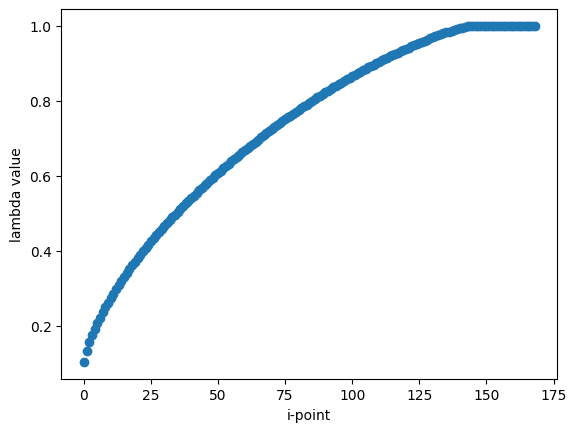

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
nums = list(range(len(exp_var)))
ax.scatter(nums, cum_exp_var);
ax.set_xlabel('i-point');
ax.set_ylabel('lambda value');

In [ ]:
# делаем маску для отсечения значений, объясняющих 95% дисперсии
# и получаем количество главных компонент
var_mask = cum_exp_var <= 0.95
sing_values = svd.singular_values_[var_mask]
n_components = sing_values.shape[0]
n_components

124

In [ ]:
# производим снижение размерности матрицы по полученному количеству компонент
svd_with_pc = TruncatedSVD(n_components=n_components)
users_reduced = svd_with_pc.fit_transform(users_stand)
users_reduced.shape

(3000, 124)

In [ ]:
users_new = pd.DataFrame(users_reduced, index=users.index)
users_new

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
39,-0.184343,-1.055075,-2.364323,0.682343,0.353953,-0.415877,0.646982,-0.460969,-0.386933,-0.482595,...,0.293988,-0.644843,-0.338400,0.170901,0.597795,0.025537,0.722347,0.429764,-0.012470,0.583451
46,-2.767245,0.121256,0.417139,0.764704,0.394784,0.146580,-0.656185,-0.484143,0.038223,-0.241881,...,-0.297111,-0.137027,-0.118275,-0.004541,-0.100408,0.176026,-0.227054,-0.000641,-0.015350,0.076386
270,-1.705099,-0.815929,0.001099,-1.411558,0.206882,0.351572,-0.074882,0.584157,-0.168841,-0.581888,...,0.392266,-0.024042,0.169564,-0.231480,-0.603645,0.308939,-0.429992,-0.272769,0.044620,-0.415259
293,-3.688382,-0.080415,-0.088498,0.130111,0.266327,-0.021342,0.207563,0.133327,0.069516,-0.224558,...,0.147672,-0.067448,-0.051930,0.127588,0.092738,0.014892,0.027924,0.072028,-0.147790,0.030534
300,-2.048331,-0.648709,0.912363,-1.095571,0.220192,0.117548,0.101530,0.080684,-0.182867,-0.397893,...,-0.098665,-0.357422,-0.702124,0.661270,0.401810,-0.173175,-0.143171,0.062549,0.144149,-0.125599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,-0.677200,2.326344,0.611041,-0.057295,1.479118,3.867004,2.177649,-2.354926,1.835430,1.798605,...,0.094079,0.838042,1.861687,1.234443,0.119544,-0.424412,-0.421174,0.522029,0.165051,0.181200
205974,-3.745732,0.218773,0.032080,0.261901,0.262864,-0.097396,0.411816,-0.212992,-0.403137,-0.015303,...,0.153929,-0.099035,-0.208436,0.116561,0.061616,-0.093840,-0.140062,0.130864,0.254158,0.114377
205978,-2.693935,0.930255,-0.572955,-0.953415,-0.243152,0.124415,-0.573330,-0.200562,-0.982871,-0.545875,...,0.344864,-0.003605,0.209902,-0.150822,0.160997,-0.199947,-0.241827,0.368108,-0.485032,0.099860
206008,-2.148376,0.226876,-0.770469,0.447857,0.225293,0.554162,-0.720744,-0.772885,-0.605864,-1.062450,...,0.784709,1.020126,0.026366,0.382901,0.877684,-0.316992,1.012513,-0.340386,-0.027644,0.364890


*Если у вас возникают трудности с использованием алгоритмов снижения размерности, можете осуществить отбор признаков любым известным вам способом (спойлер - это будет сложнее).   

# **5. Кластеризация пользователей (max 5 баллов)**

На основе полученного набора данных произведите сегментацию пользователей.  
  
**За что можно получить баллы в этой секции**:  

1. Применяются 2 различных алгоритма кластеризации (**+ 1 балл**)
2. Применяются 3 или более различных алгоритмов кластеризации (**+ 2 балла**)  
3. Подбор гиперпараметров (**+ 1 балл за каждый алгоритм**).
> Например, определяется оптимальное число кластеров (в случае центроидных алгоритмов), порог отсечения дендрограммы (в случае иерархической кластеризации), ``eps`` или ``minpts`` (в случае плотностных алгоритмов), метрики расстояния (для всех алгоритмов) и т.п.
3. Имеется итоговая оценка качества решения задачи по алгоритмам, выводятся соответствующие метрики (**+ 1 балл**)  
4. Попытка интерпретировать кластеры на основе базового набора данных с заказами пользователей (вывод соответствующих пользователей по id, анализ признаков в попытках понять, почему они составляют кластер) (**+1 балл**)
5. Бонус на мое усмотрение (**+ 1 балл**)
  
Т.е., если вы корректно использовали 2 алгоритма, для обоих подобрали гиперпараметры и вывели итоговые метрики, сказав, какой из алгоритмов работает лучше, а также сделали попытку интерпретации кластеров - это +5 баллов в итоговую копилку.
  


И как всегда, отсутствие комментариев к коду отрицательно сказывается на результате.  

In [ ]:
users_new

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
39,-0.184343,-1.055075,-2.364323,0.682343,0.353953,-0.415877,0.646982,-0.460969,-0.386933,-0.482595,...,0.293988,-0.644843,-0.338400,0.170901,0.597795,0.025537,0.722347,0.429764,-0.012470,0.583451
46,-2.767245,0.121256,0.417139,0.764704,0.394784,0.146580,-0.656185,-0.484143,0.038223,-0.241881,...,-0.297111,-0.137027,-0.118275,-0.004541,-0.100408,0.176026,-0.227054,-0.000641,-0.015350,0.076386
270,-1.705099,-0.815929,0.001099,-1.411558,0.206882,0.351572,-0.074882,0.584157,-0.168841,-0.581888,...,0.392266,-0.024042,0.169564,-0.231480,-0.603645,0.308939,-0.429992,-0.272769,0.044620,-0.415259
293,-3.688382,-0.080415,-0.088498,0.130111,0.266327,-0.021342,0.207563,0.133327,0.069516,-0.224558,...,0.147672,-0.067448,-0.051930,0.127588,0.092738,0.014892,0.027924,0.072028,-0.147790,0.030534
300,-2.048331,-0.648709,0.912363,-1.095571,0.220192,0.117548,0.101530,0.080684,-0.182867,-0.397893,...,-0.098665,-0.357422,-0.702124,0.661270,0.401810,-0.173175,-0.143171,0.062549,0.144149,-0.125599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205877,-0.677200,2.326344,0.611041,-0.057295,1.479118,3.867004,2.177649,-2.354926,1.835430,1.798605,...,0.094079,0.838042,1.861687,1.234443,0.119544,-0.424412,-0.421174,0.522029,0.165051,0.181200
205974,-3.745732,0.218773,0.032080,0.261901,0.262864,-0.097396,0.411816,-0.212992,-0.403137,-0.015303,...,0.153929,-0.099035,-0.208436,0.116561,0.061616,-0.093840,-0.140062,0.130864,0.254158,0.114377
205978,-2.693935,0.930255,-0.572955,-0.953415,-0.243152,0.124415,-0.573330,-0.200562,-0.982871,-0.545875,...,0.344864,-0.003605,0.209902,-0.150822,0.160997,-0.199947,-0.241827,0.368108,-0.485032,0.099860
206008,-2.148376,0.226876,-0.770469,0.447857,0.225293,0.554162,-0.720744,-0.772885,-0.605864,-1.062450,...,0.784709,1.020126,0.026366,0.382901,0.877684,-0.316992,1.012513,-0.340386,-0.027644,0.364890


## нужные функции:

In [ ]:
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)

def evaluate_clustering_model(data, labels):
    print(f'Silhouette score: {silhouette_score(data, labels)}')
    # показывает, насколько в среднем объект кластера ближе к объектам своего кластера, чем других (больше -> лучше)
    print(f'Calinski-Harabasz index: {calinski_harabasz_score(data, labels)}')
    # показывает, насколько в среднем кластеры плотные и хорошо разделены
    # или насколько сильно точки распределены между кластерами (больше -> лучше)
    print(f'Davies-Bouldin score: {davies_bouldin_score(data, labels)}')
    # показывает, насколько в среднем каждый кластер близок к самому похожему кластеру (меньше -> лучше)

In [ ]:
# костыль для нормальной работы GridSearch
def custom_silhouette_score(model, data):
    labels = model.fit_predict(data)
    return silhouette_score(data, labels)

In [ ]:
from sklearn.model_selection import GridSearchCV

# функция для подбора гиперпараметров на кросс-валидации
# возвращает лучшую модель
def choose_best_model(model, params, data) -> object:
    grid_search = GridSearchCV(estimator=model, # инициализируем класс подбора гиперпараметров
                      param_grid=params,
                      scoring=custom_silhouette_score, # сравнивать модели будем по метрике silhouette_score
                      verbose=2,
                      cv=3)
    grid_search.fit(data) # обучаем

    best_model = grid_search.best_estimator_ # получаем объект лучшей модели
    labels = best_model.fit_predict(data) # обучаем лучшую модель ещё

    evaluate_clustering_model(data, labels) # считаем и выводим метрики

    return best_model

In [ ]:
from sklearn.manifold import TSNE

# функция для построения точечной диаграммы с кластерами после t-SNE
def plot_clusters_tsne(data, labels):
    users_to_plot_tsne = TSNE(random_state=0).fit_transform(users_new)
    plt.scatter(x=users_to_plot_tsne[:, 0],
                y=users_to_plot_tsne[:, 1],
                c=labels)
    plt.show()

## 5.1. Алгоритм №1 – иерархическая кластеризация AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

parameters = {
    'n_clusters': [2, 4, 6, 8, 10, 12, 14],
    'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
    'linkage': ['ward', 'complete', 'average', 'single']
}
ag_clust_model = choose_best_model(AgglomerativeClustering(), parameters, users_new)

Fitting 3 folds for each of 140 candidates, totalling 420 fits
[CV] END .......linkage=ward, metric=euclidean, n_clusters=2; total time=   0.4s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=2; total time=   0.4s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=2; total time=   0.4s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=4; total time=   0.4s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=4; total time=   0.4s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=4; total time=   0.4s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=6; total time=   0.4s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=6; total time=   0.4s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=6; total time=   0.5s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=8; total time=   0.6s
[CV] END .......linkage=ward, metric=euclidean, n_clusters=8; total time=   0.6s
[CV] END .......linkage=ward, metric=euclidean

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
84 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 684, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py", line 956, in fit
    return self._fit(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py", line 1005, in _fit
    raise ValueError(
ValueError: l1 was provided as metric. Ward can only work with euclidean d

Silhouette score: 0.8446066748493213
Calinski-Harabasz index: 63.085984984516486
Davies-Bouldin score: 0.10465394467876532


*Анализ метрик: внутри кластера объекты похожи друг на друга (близки) сильно больше, чем на объекты других кластеров, а сами кластеры далеки от других, однако "плотность" точек внутри кластеров не очень высокая.*

In [ ]:
# отдельно выведем параметры лучшей модели:
ag_clust_model.get_params()

{'affinity': 'deprecated',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'complete',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 2}

## 5.2. Алгоритм №2 – центроидная кластеризация K-Means

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

parameters = {
    'n_clusters': [2, 4, 6, 8, 10, 12, 14],
    'init': ['random', 'k-means++'],
    'algorithm': ['lloyd', 'elkan'],
    'max_iter': [50, 100, 200, 300]
}
k_means_model = choose_best_model(KMeans(), parameters, users_new)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=2; total time=   0.2s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=2; total time=   0.1s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=2; total time=   0.1s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=4; total time=   0.2s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=4; total time=   0.2s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=4; total time=   0.2s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=6; total time=   0.2s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=6; total time=   0.2s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=6; total time=   0.6s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=8; total time=   4.8s
[CV] END algorithm=lloyd, init=random, max_iter=50, n_clusters=8; total time=   2.9s
[C

*Анализ метрик: внутри кластера объекты похожи друг на друга несильно больше, чем на объекты других кластеров, кластеры близки к другим, однако "плотность" точек внутри кластеров высокая.*

In [ ]:
k_means_model.get_params()

{'algorithm': 'elkan',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 200,
 'n_clusters': 2,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## 5.3. Алгоритм №3 – плотностная кластеризация DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

# понимая, что это м.б. не очень продуктивно, я всё-таки рискну подобрать гиперпараметры
# DBSCAN'a на кросс-валидации без подсчётов расстояний между точками при разных m
parameters = {
    'eps': [x / 100 for x in range(100, 205, 5)], # проверяю сначала на очень маленьких значениях
    'min_samples': range(3, 10)
}
dbscan_model = choose_best_model(DBSCAN(), parameters, users_new)

Fitting 3 folds for each of 147 candidates, totalling 441 fits
[CV] END .............................eps=1.0, min_samples=3; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=3; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=3; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=4; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=4; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=4; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=5; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=5; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=5; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=6; total time=   0.1s
[CV] END .............................eps=1.0, min_samples=6; total time=   0.1s
[CV] END .............................eps=1.0,

In [ ]:
dbscan_model.get_params()

{'algorithm': 'auto',
 'eps': 2.0,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 9,
 'n_jobs': None,
 'p': None}

In [ ]:
# получилось достаточно плохо, поэтому всё-таки я попробую применить подбор
# значений m и eps из семинара, чтобы посмотреть, изменится ли что-то
from scipy.spatial.distance import pdist, squareform

def get_nn_distances(data, m):
    dist_matrix = pd.DataFrame(squareform(pdist(data, metric='euclidean'))) # считаем матрицу расстояний между точками
    dist_matrix.values.sort(axis=1) # сортируем по строкам
    distances = np.mean(dist_matrix.iloc[:, 1:m+1], axis=1) # считаем средние расстояния до ближайших m точек
    return distances.sort_values() # сортируем эти расстояния

In [ ]:
def plot_sorted_dist(distances):
    plt.figure(figsize=(10, 3))
    plt.plot(range(len(distances)), distances)
    plt.xlabel("Sorted distances")
    plt.ylabel("Mean distance over m NN-s")
    plt.grid()
    plt.show()

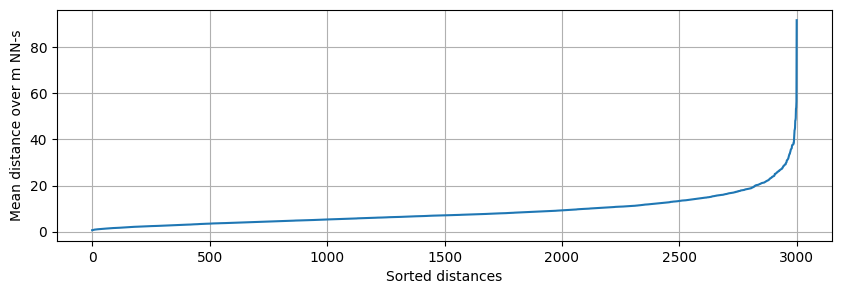

In [ ]:
distances = get_nn_distances(users_new, 6) # рекомендовано брать m от 3 до 9, возьмём среднее
plot_sorted_dist(distances)

In [ ]:
# ага, оказывается, надо было брать eps сиииильно больше того, что брал я ранее)
# возьмём теперь промежуток [40, 50] для GridSearch
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

parameters = {
    'eps': range(40, 51),
    'min_samples': range(3, 10) # здесь не стал менять на 6, чтобы проверить, вдруг с другим m станет лучше
}
dbscan_model = choose_best_model(DBSCAN(), parameters, users_new)

Fitting 3 folds for each of 77 candidates, totalling 231 fits
[CV] END ..............................eps=40, min_samples=3; total time=   0.6s
[CV] END ..............................eps=40, min_samples=3; total time=   0.4s
[CV] END ..............................eps=40, min_samples=3; total time=   0.3s
[CV] END ..............................eps=40, min_samples=4; total time=   0.5s
[CV] END ..............................eps=40, min_samples=4; total time=   0.6s
[CV] END ..............................eps=40, min_samples=4; total time=   0.7s
[CV] END ..............................eps=40, min_samples=5; total time=   0.6s
[CV] END ..............................eps=40, min_samples=5; total time=   0.5s
[CV] END ..............................eps=40, min_samples=5; total time=   0.6s
[CV] END ..............................eps=40, min_samples=6; total time=   0.9s
[CV] END ..............................eps=40, min_samples=6; total time=   0.3s
[CV] END ..............................eps=40, 

*Анализ метрик: ситуация похожа на иерархическую кластеризацию, однако хуже: хотя внутри кластера объекты похожи друг на друга больше, чем на объекты других кластеров, кластеры не далеки от других и "плотность" точек внутри кластеров невысокая.*

In [ ]:
dbscan_model.get_params() # и правда стало лучше с m=3

{'algorithm': 'auto',
 'eps': 46,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 3,
 'n_jobs': None,
 'p': None}

## анализ результатов:

In [ ]:
# используем результаты лучшей модели...
labels_ag = pd.Series(ag_clust_model.labels_)
labels_ag.value_counts()
# ...и получаем удивительный результат

0    2999
1       1
Name: count, dtype: int64

In [ ]:
# тогда давайте посмотрим, что выделила плотностная модель...
labels_dbscan = pd.Series(dbscan_model.labels_)
labels_dbscan.value_counts()
# получается, обе модели считают, что в датасете один класс,
# в котором просто есть несколько выбросов

 0    2994
-1       6
Name: count, dtype: int64

In [ ]:
# тогда остаётся вариант взять лучшую модель и устроить кросс-валидацию ещё раз,
# на этот раз эксплицитно запрещая ей брать значение n_components=2 и близкие к нему
# (будем брать от 6 – от количества выбросов, определённого плотностной моделью)
from sklearn.cluster import AgglomerativeClustering

parameters = {
    'n_clusters': [7, 8, 9, 10, 11, 12, 13, 14],
    'metric': ['euclidean'], # остальные гиперпараметры оставим как в лучшей иерархической модели на прошлой кросс-валидации
    'linkage': ['complete']
}
ag_clust_model = choose_best_model(AgglomerativeClustering(), parameters, users_new)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...linkage=complete, metric=euclidean, n_clusters=7; total time=   0.6s
[CV] END ...linkage=complete, metric=euclidean, n_clusters=7; total time=   0.5s
[CV] END ...linkage=complete, metric=euclidean, n_clusters=7; total time=   0.5s
[CV] END ...linkage=complete, metric=euclidean, n_clusters=8; total time=   0.5s
[CV] END ...linkage=complete, metric=euclidean, n_clusters=8; total time=   0.5s
[CV] END ...linkage=complete, metric=euclidean, n_clusters=8; total time=   0.5s
[CV] END ...linkage=complete, metric=euclidean, n_clusters=9; total time=   0.5s
[CV] END ...linkage=complete, metric=euclidean, n_clusters=9; total time=   0.4s
[CV] END ...linkage=complete, metric=euclidean, n_clusters=9; total time=   0.3s
[CV] END ..linkage=complete, metric=euclidean, n_clusters=10; total time=   0.3s
[CV] END ..linkage=complete, metric=euclidean, n_clusters=10; total time=   0.3s
[CV] END ..linkage=complete, metric=euclidean, n_

In [ ]:
ag_clust_model.get_params()
# на кросс-валидации подобралось 7 кластеров –
# что-то мне подсказывает, что снова только один класс будет многочисленным

{'affinity': 'deprecated',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'complete',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 7}

In [ ]:
labels_ag = pd.Series(ag_clust_model.labels_)
labels_ag.value_counts()
# ну в общем ч.т.д.

0    2993
1       2
3       1
6       1
5       1
4       1
2       1
Name: count, dtype: int64

In [ ]:
# стало интересно посмотреть на кластеризацию достаточно плохо показавшего себя K-Means,
# возможно, как раз-таки именно он на самом деле точнее всего делит данные на кластеры
labels_km = pd.Series(k_means_model.labels_)
labels_km.value_counts()

1    2521
0     479
Name: count, dtype: int64

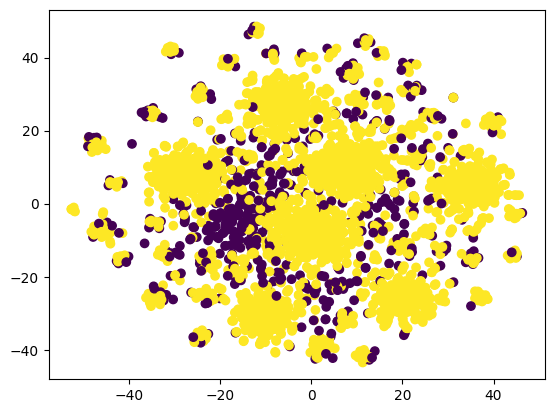

In [ ]:
# посмотрим на эти кластеры, чтобы самим оценить, насколько они адекватные
plot_clusters_tsne(users_new, labels_km)
# очень красиво, но, к сожалению, кластеризация явно неудачная

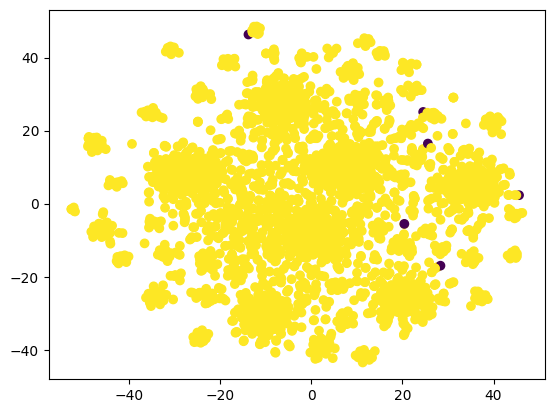

In [ ]:
# для интереса посмотрим на те выбросы, которые нашла модель DBSCAN
plot_clusters_tsne(users_new, labels_dbscan)
# кажется, выбросы определились тоже так себе)

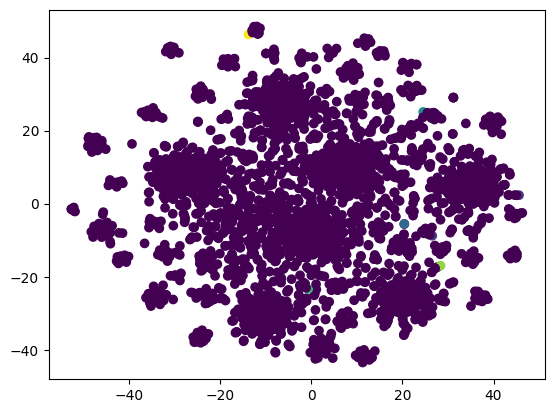

In [ ]:
# посмотрим, те же ли выбросы определила иерархическая модель или вдруг нет
plot_clusters_tsne(users_new, labels_ag)
# действительно подсвечены те же точки, что и выше
# жаль только, что назвать это выбросами или отдельными единичными кластерами всё ещё как-то язык не поворачивается

# **6. Итоговый вывод (0.5 балла)**


Что было проделано, о чем новом вы узнали, какой из алгоритмов больше подходит для решения задачи сегментации и др.  

В ходе выполнения лабораторной была проделана работа по выделению полезных признаков из сырого датасета, снижению размерности через сингулярное разложение с подбором количества главных компонент и обучение с кросс-валидацией трёх моделей кластеризации разной статистической природы: иерархической, центроидной и плотностной. Опыт новый, интересный, помог на практике понять некоторые принипы реализации всех этих процедур.

По трём метрикам кластеризации лучшей оказалась иерархическая модель, однако при анализе полученных кластеров оказалось, что ни одна из исследованных моделей не способна кластеризовать данный датасет – модели либо объединяют почти все объекты в один кластер, либо выделяют кластеры некачественно. На точечных диаграммах видно, что наши данные имеют достаточно сложную структуру – по-видимому, использованные нами модели сами по себе не способы работать с такой структурой и нужно использовать другие. С другой стороны, среди возможных причин неудовлетворительного результата может быть подбор признаков, нерелевантных для разграничения покупателей по их, условно говоря, потребительским привычкам. Допускаю, что могли произойти ошибки при снижении размерности матрицы или, например, стоило выбрать другую метрику для сравнения моделей при кросс-валидации. Однако характерно, что иерархическая и density-based модели выдали достаточно схожие результаты, а именно – выделили одну и ту же группу выбросов (хотя и, по моему мнению, некачественно) – при этом эти же две модели имеют лучший результат по двум метрикам кластеризации.

# **7. Дополнительные задания (на оценку "10")**

**В случае, если ваша итоговая сумма баллов составляет "10", ставится оценка "9".**  

**Для получения 10 баллов за работу выбирайте одну из двух опций** (или обе, если вы любите ИАД :):  
1. Визуализация кластеров с использованием нелинейных методов снижения размерности (например, t-SNE).  
2. Кластеризация с использованием какого-либо алгоритма, который [не упоминался на семинарах](https://scikit-learn.org/stable/modules/clustering.html) (например, Affinity propagation).  
Список алгоритмов, которые упоминались: linkage (иерархическая), DBSCAN, OPTICS, k-means и его разновидности, k-medoids и PAM.  